In [1]:
from imports import *
from utils import process_file

In [39]:
warnings.filterwarnings("ignore")

### **Ajuste de modelos** 

* A partir de las transformaciones propuestas ajustar distintos modelos (S)ARIMA. Extraer orden, parámetros, coeficientes numéricos y análisis de la bondad del modelo.
* Ajustar y predecir usando redes neuronales LSTM. Comparar con predicciones usando SARIMA y extraer conclusiones.
* Reailzar el análisis espectral de la serie original. Hallar las frecuencias principales y comparar con las componentes cíclica y estacional usando la descomposición.

#### Cargamos dataset ya preprocesado

In [2]:
bicis_data = process_file()

In [6]:
type(bicis_data)

pandas.core.series.Series

#### Fiteamos un MA(7)
El valor 7 lo elegimos a partir de observar los graficos de acf y pacf en notebook de EDA

In [7]:
order = 7
ma_model = ARIMA(bicis_data, order=(0, 0, order)).fit()
#ma_model.summary()

#### Fiteamos un AR(7)
El valor 7 lo elegimos a partir de observar los graficos de acf y pacf

In [8]:
lag_order = 7
ar_model = AutoReg(bicis_data, lags=lag_order).fit()
#ar_model.summary()

In [9]:
def plot_error(model, model_name):
    err_raw = model.predict() - bicis_data
    plt.violinplot([err_raw.dropna(), bicis_data.dropna()])
    plt.title(model_name)
    plt.grid()

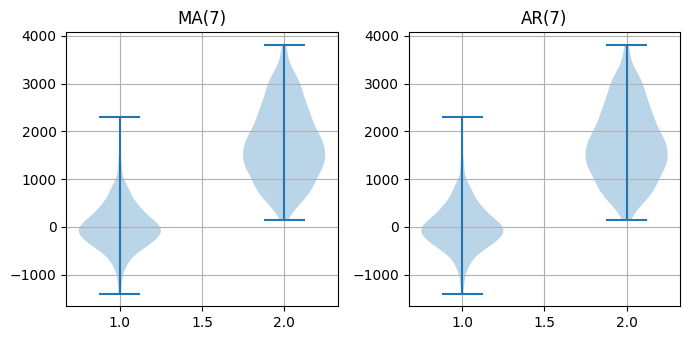

In [27]:
plt.figure(figsize=(7,3.5))
plt.subplot(1, 2, 1)
plot_error(ar_model, "MA(7)")
plt.subplot(1, 2, 2)
plot_error(ar_model, "AR(7)")
plt.tight_layout()
plt.show()

In [35]:
def plot_relative_error(model, model_name):
    #Para calcular el error relativo, eliminamos los ceros que corresponden a 13 datapoints
    mask = bicis_data > 0
    err_raw = model.predict() - bicis_data
    percentiles = np.percentile((err_raw[mask] / bicis_data[mask]).dropna(), [25,50,75])
    print("percentiles:", f'{model_name}', percentiles)
    plt.violinplot((err_raw[mask] / bicis_data[mask]).dropna(), points=300)
    plt.hlines(percentiles, 0.7, 1.3, color='k', linestyle='--')
    plt.ylim(-2,3)
    plt.title(model_name)
    plt.grid()
    

percentiles: Error relativo: AR(7) [-0.13584936 -0.0228191   0.21956661]
percentiles: Error relativo: MA(7) [-0.14561456 -0.00641774  0.31278894]


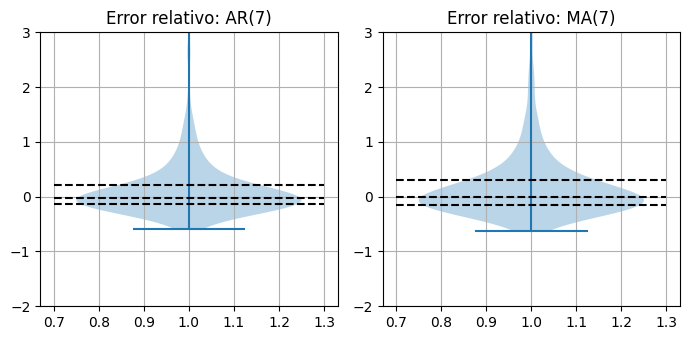

In [36]:
plt.figure(figsize=(7,3.5))
plt.subplot(1, 2, 1)
plot_relative_error(ar_model, "Error relativo: AR(7)")
plt.subplot(1, 2, 2)
plot_relative_error(ma_model, "Error relativo: MA(7)")
plt.tight_layout()
plt.show()

##### **Observacion**

* La mediana del error del **modelo autoregresivo** esta en -0.022, lo que significa que el **50%** de las veces predice alrededor de 2.2% menos que la data real.  El **25%** de las veces predice por defecto por lo menos un 13% menos que la data real.
En el extremo superior, en el percentil **75** ,predice por exceso al menos un 21% mas que la data real.

* La mediana del error del **modelo moving average** esta en -0.006, lo que significa que el **50%** de las veces predice alrededor de 0.6% menos que la data real.  El **25%** de las veces predice por defecto por lo menos un 14% menos que la data real.
En el extremo superior, en el percentil **75** ,predice por exceso al menos un 31% mas que la data real.
 


#### Fiteamos un ARIMA(7,1,7)

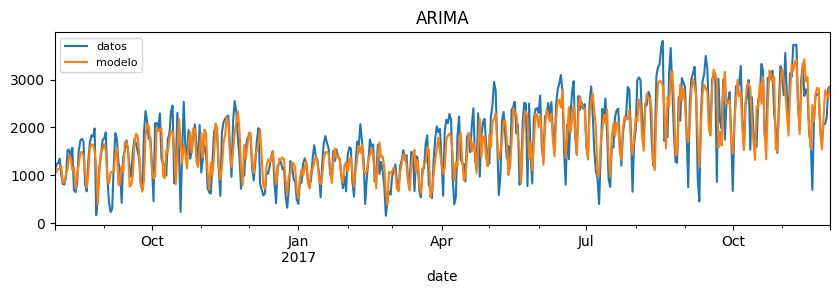

time to fit:  1.41 seg


In [45]:
def plotARMA(series,ax):
    mod = sm.tsa.ARIMA(series, order=(7,1,7), missing='raise').fit()
    series.plot(ax=ax,label="datos")
    mod.predict()[1:].plot(ax=ax,label="modelo")
    return mod

fig,ax = plt.subplots(figsize=(10,2.5))    
t0 = time()
arima = plotARMA(bicis_data,ax)
arima_time = time() - t0

plt.legend(fontsize=8)
plt.title("ARIMA")
plt.show()

arima_time_rounded = round(arima_time, 2)
print("time to fit: ", arima_time_rounded, "seg")